In [31]:
from pydiffmap import diffusion_map as dm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_cluster(x,y,x_axis,y_axis,colors,title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y, color=colors, s=5)
    ax.set_xlabel(x_axis, size=15)
    ax.set_ylabel(y_axis, size=15)
#     ax.set_xlim([min(x),max(x)])
#     ax.set_ylim([min(y),max(y)])
    ax.set_xticklabels(ax.get_xticks(), size=12)
    ax.set_yticklabels(ax.get_yticks(), size=12)
    ax.spines["top"].set_visible(False);
    ax.spines["right"].set_visible(False);
    ax.get_xaxis().tick_bottom();
    ax.get_yaxis().tick_left();
    purple_patch = mpatches.Patch(color='purple', label='Ad Mixed American')
    blue_patch = mpatches.Patch(color='blue', label=' African')
    green_patch = mpatches.Patch(color='green', label='East Asian')
    yellow_patch = mpatches.Patch(color='yellow', label='European')
    orange_patch = mpatches.Patch(color='orange', label='South Asian')
    plt.legend(handles=[purple_patch, blue_patch,green_patch, yellow_patch,orange_patch],loc="center left", bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.show()

In [12]:
data = np.loadtxt("ps2_pca.genotypes.tab")
data = data.T
data.shape

(2504, 28622)

In [ ]:
colors = np.genfromtxt("geno_color.txt",dtype='str')

In [37]:
neighbor_params = {'n_jobs': -1, 'algorithm': 'kd_tree'}
mydmap = dm.DiffusionMap.from_sklearn(n_evecs=2, k=300, epsilon='bgh', alpha=1.0, neighbor_params=neighbor_params)
dmap = mydmap.fit_transform(data)

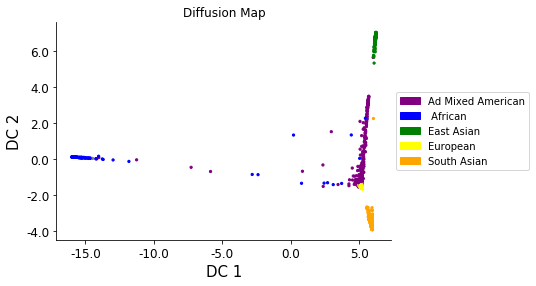

In [38]:
plot_cluster(dmap[:,0],dmap[:,1],"DC 1","DC 2",colors,"Diffusion Map")